# 导包并配置基础路径

In [139]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

base = "/content/drive/MyDrive/Colab Notebooks/AndrewNg-Machine-Learning-Homework/ex2-Logistic-Regression"

# Logistic回归

## 导入数据

In [140]:
path = base + "/ex2data1.txt"
data = pd.read_csv(path, header=None, names=["Score1", "Score2", "Admitted"])
data

,Score1,Score2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


## 数据可视化

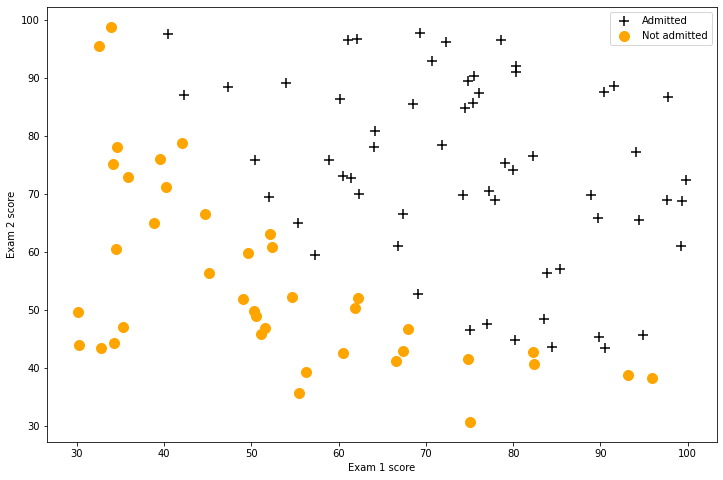

In [141]:
# 分割出正样本和负样本
positive = data[data["Admitted"].isin([1])]
negative = data[data["Admitted"].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive["Score1"], positive["Score2"], s=100, color='black', marker="+", label="Admitted")
ax.scatter(negative["Score1"], negative["Score2"], s=100, color='orange', marker="o", label="Not admitted")
ax.legend()
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")
plt.xticks(np.arange(30, 101, 10))
plt.yticks(np.arange(30, 101, 10))
plt.show()

## 数据切割

In [142]:
data.insert(0, "Ones", 1)

In [143]:
cols = data.shape[1]

X = np.array(data.iloc[:, :cols-1])
Y = np.array(data.iloc[:, cols-1:cols])
X, Y

(array([[ 1.        , 34.62365962, 78.02469282],
        [ 1.        , 30.28671077, 43.89499752],
        [ 1.        , 35.84740877, 72.90219803],
        [ 1.        , 60.18259939, 86.3085521 ],
        [ 1.        , 79.03273605, 75.34437644],
        [ 1.        , 45.08327748, 56.31637178],
        [ 1.        , 61.10666454, 96.51142588],
        [ 1.        , 75.02474557, 46.55401354],
        [ 1.        , 76.0987867 , 87.42056972],
        [ 1.        , 84.43281996, 43.53339331],
        [ 1.        , 95.86155507, 38.22527806],
        [ 1.        , 75.01365839, 30.60326323],
        [ 1.        , 82.30705337, 76.4819633 ],
        [ 1.        , 69.36458876, 97.71869196],
        [ 1.        , 39.53833914, 76.03681085],
        [ 1.        , 53.97105215, 89.20735014],
        [ 1.        , 69.07014406, 52.74046973],
        [ 1.        , 67.94685548, 46.67857411],
        [ 1.        , 70.66150955, 92.92713789],
        [ 1.        , 76.97878373, 47.57596365],
        [ 1.        

## Sigmoid函数
$$g(z)=\frac{1}{1+e^{-z}}$$

In [144]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

## 绘制Sigmoid函数图像

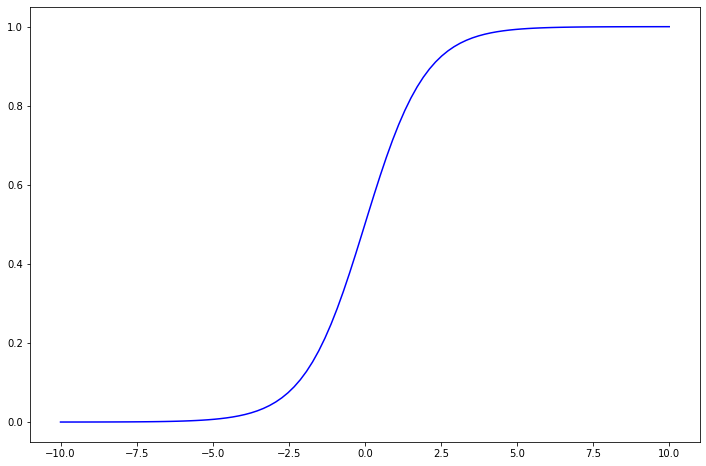

In [145]:
x = np.linspace(-10, 10, 100)
f = sigmoid(x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'blue')
plt.show()

## 假设函数
### 单样本：
$$
h(\theta)
=g(\theta^Tx)
=g(\theta_0x_0+\theta_1x_1+...+\theta_nx_n)
$$
其中：$x$为(n+1)×1维，$\theta$为(n+1)×1维，$h(\theta)$为标量。

### 多样本：
$$
h(\theta)
=g(X\theta)
$$
其中：$X$为m×(n+1)维，$\theta$为(n+1)×1维，$h(\theta)$为m×1维。

In [146]:
def Hypothesis(X, theta):
  return sigmoid(X @ theta)

## 代价函数
原公式：
$$
J(\theta)
=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}\log(\hat y^{(i)})-(1-y^{(i)})\log(1-\hat y^{(i)})]
=-\frac{1}{m}[y^{(1)}\log(\hat y^{(1)})+y^{(2)}\log(\hat y^{(2)})+...+y^{(m)}\log(\hat y^{(m)})+(1-y^{(1)})\log(1-\hat y^{(1)})+(1-y^{(2)})\log(1-\hat y^{(2)})+...+(1-y^{(m)})\log(1-\hat y^{(m)})]
$$

实现公式：
$$
J(\theta)
=-\frac{1}{m}[y^T\log(\hat y)+(1-y)^T\log(1-\hat y)]
$$
其中：
$$
y^T=\begin{bmatrix}
y^{(1)}  & y^{(2)} & ... & y^{(m)}
\end{bmatrix}；
(1-y)^T=\begin{bmatrix}
(1-y)^{(1)}  & (1-y)^{(2)} & ... & (1-y)^{(m)}
\end{bmatrix}$$
$$
\log(\hat y)=\begin{bmatrix}
\log(\hat y)^{(1)} \\
\log(\hat y)^{(2)} \\
\vdots \\
\log(\hat y)^{(m)}
\end{bmatrix}；
\log(1-\hat y)=\begin{bmatrix}
\log(1-\hat y)^{(1)} \\
\log(1-\hat y)^{(2)} \\
\vdots \\
\log(1-\hat y)^{(m)}
\end{bmatrix}$$

In [147]:
def ComputeCost(X, Y, theta):
  m = X.shape[0]
  y_hat = np.array(Hypothesis(X, theta))
  return -1 * (Y.T @ np.log(y_hat) + (1-Y).T @ np.log(1-y_hat)) / m

## 计算梯度
公式：

Repeat j from 0 to n:
$$
\frac{\partial J(\theta )}{\partial \theta _j}
=\frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} -y^{(i)})x_j^{(i)}
=\frac{1}{m}[(\hat{y}^{(1)} -y^{(1)})x_j^{(1)}+(\hat{y}^{(2)} -y^{(2)})x_j^{(2)}+...+(\hat{y}^{(m)} -y^{(m)})x_j^{(m)}]
$$

实际公式：
$$
\frac{\partial J(\theta )}{\partial \theta }
=\begin{bmatrix}
\frac{\partial J(\theta )}{\partial \theta _0} \\
\frac{\partial J(\theta )}{\partial \theta _1} \\
\vdots  \\
\frac{\partial J(\theta )}{\partial \theta _n}
\end{bmatrix}
=\frac{1}{m} \begin{bmatrix}
(\hat{y}^{(1)} -y^{(1)})x_0^{(1)}+(\hat{y}^{(2)} -y^{(2)})x_0^{(2)}+...+(\hat{y}^{(m)} -y^{(m)})x_0^{(m)} \\
(\hat{y}^{(1)} -y^{(1)})x_1^{(1)}+(\hat{y}^{(2)} -y^{(2)})x_1^{(2)}+...+(\hat{y}^{(m)} -y^{(m)})x_1^{(m)} \\
\vdots  \\
(\hat{y}^{(1)} -y^{(1)})x_n^{(1)}+(\hat{y}^{(2)} -y^{(2)})x_n^{(2)}+...+(\hat{y}^{(m)} -y^{(m)})x_n^{(m)}
\end{bmatrix}
=\frac{1}{m}X^T(\hat{y} -y) 
$$

其中：$\frac{\partial J(\theta )}{\partial \theta }$为(n+1)×1维
$$X^T=\begin{bmatrix}
x_0^{(1)}  & x_0^{(2)} & ... & x_0^{(m)}\\
x_1^{(1)}  & x_1^{(2)} & ... & x_1^{(m)}\\
 \vdots   & \vdots & \vdots & \vdots\\
x_n^{(1)}  & x_n^{(2)} & ... & x_n^{(m)}
\end{bmatrix}_{(n+1)\times m}
(\hat y-y)=
\begin{bmatrix}
\hat y^{(1)}-y^{(1)}
\\
\hat y^{(2)}-y^{(2)}
 \\
...
 \\
\hat y^{(m)}-y^{(m)}
\end{bmatrix}_{m\times 1}$$

In [148]:
def ComputePartial(X, Y, theta):
  m = X.shape[0]
  y_hat = np.array(Hypothesis(X, theta))
  return (X.T @ (y_hat - Y)) / m

## 梯度下降

In [149]:
def GradientDescent(X, Y, theta, Iterations, LearningRate):
  cost = np.zeros(Iterations)
  for i in range(Iterations):
    cost[i] = ComputeCost(X, Y, theta)
    theta = theta - LearningRate * ComputePartial(X, Y, theta)
  return cost, theta

## 运行梯度下降

In [150]:
Iterations = 1000
LearningRate = 0.001
theta = np.matrix(np.zeros(X.shape[1])).T

cost, theta = GradientDescent(X, Y, theta, Iterations, LearningRate)
print("cost：", cost)
print("theta：", theta)

cost： [0.69314718 0.69829069 0.65971176 0.66162727 0.64886153 0.64969609
 0.64310987 0.64346521 0.63952523 0.6396434  0.63709581 0.63709203
 0.63536394 0.63529843 0.63408777 0.63399367 0.63312565 0.6330216
 0.63238831 0.63228474 0.63181635 0.63171885 0.63136856 0.63127986
 0.63101541 0.63093653 0.63073524 0.63066619 0.63051182 0.63045204
 0.63033282 0.63028147 0.63018876 0.63014489 0.63007228 0.63003491
 0.62997763 0.62994584 0.62990031 0.62987325 0.62983674 0.62981366
 0.62978412 0.62976436 0.62974021 0.6297232  0.62970324 0.6296885
 0.62967179 0.62965892 0.62964475 0.6296334  0.62962122 0.62961112
 0.62960049 0.6295914  0.62958199 0.62957372 0.62956527 0.62955767
 0.62954996 0.6295429  0.62953579 0.62952916 0.62952252 0.62951623
 0.62950996 0.62950396 0.62949798 0.6294922  0.62948645 0.62948086
 0.62947529 0.62946984 0.62946442 0.62945908 0.62945377 0.62944853
 0.62944331 0.62943815 0.629433   0.6294279  0.62942281 0.62941775
 0.6294127  0.62940768 0.62940268 0.62939769 0.62939271 0.

## 绘制代价函数曲线

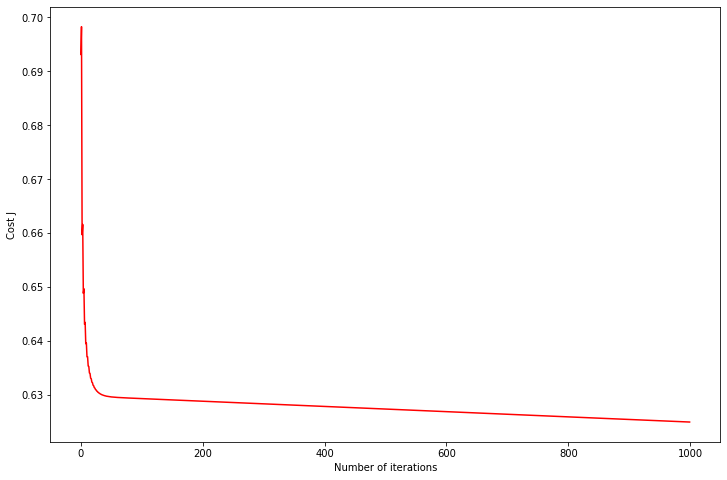

In [151]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(Iterations), cost, 'r')
ax.set_xlabel("Number of iterations")
ax.set_ylabel("Cost J")
plt.show()

## 绘制拟合曲线

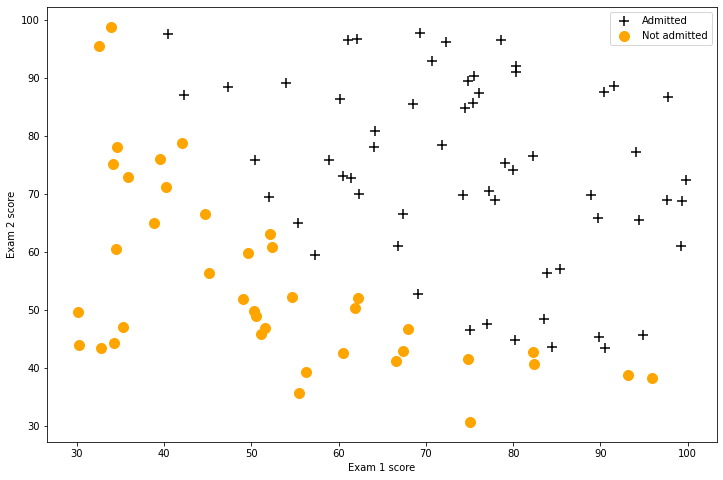

In [152]:
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(positive["Score1"], positive["Score2"], s=100, color='black', marker="+", label="Admitted")
ax.scatter(negative["Score1"], negative["Score2"], s=100, color='orange', marker="o", label="Not admitted")
# x = np.linspace(data["Score1"].min(), data["Score1"].max(), 100)
# f = np.array((theta[0] + theta[1] * x) / theta[2])[0]
# ax.plot(x, f, 'blue')
ax.legend()
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")
plt.xticks(np.arange(30, 101, 10))
plt.yticks(np.arange(30, 101, 10))
plt.show()

## 计算Precision和Recall

In [153]:
def ComputePRandF1(X, Y, theta):
  TP = 0
  FP = 0
  TN = 0
  FN = 0

  y_hat = Hypothesis(X, theta)
  for i in range(X.shape[0]):
    y_hat[i] = 1 if y_hat[i] >= 0.5 else 0
    
    if y_hat[i]:
      if y_hat[i] == Y[i]:
        TP = TP + 1
      else:
        FP = FP + 1
    else:
      if y_hat[i] == Y[i]:
        TN = TN + 1
      else:
        FN = FN + 1
  P = TP/(TP+FP)
  R = TP/(TP+FN)
  F1 = 2*P*R/(P+R)
  print("TP：%d, FP：%d, TN：%d, FN：%d" % (TP, FP, TN, FN))
  print("Precision：", P)
  print("Recall：", R)
  print("F1：", F1)

In [ ]:
ComputePRandF1(X, Y, theta)

TP：60, FP：40, TN：0, FN：0
Precision： 0.6
Recall： 1.0
F1： 0.7499999999999999


## 特征归一化

In [154]:
Iterations = 400
LearningRate = 0.5
theta = np.matrix(np.zeros(X.shape[1])).T

def featureNormalize(X):
  X = X.astype(float)
  for i in range(1, X.shape[1]):
    temp1 = X[:, i] - np.mean(X[:, i])
    temp2 = temp1 / np.std(X[:, i])
    X[:, i] = temp2
  return X

X_scale = featureNormalize(X)

cost, theta = GradientDescent(X_scale, Y, theta, Iterations, LearningRate)
print("cost：", cost)
print("theta：", theta)

cost： [0.69314718 0.62173732 0.56650187 0.52328352 0.48891962 0.46111713
 0.43824041 0.41912136 0.40291732 0.38901173 0.37694625 0.36637476
 0.35703184 0.348711   0.34124943 0.33451718 0.32840933 0.32284026
 0.31773945 0.3130483  0.30871769 0.30470616 0.30097847 0.29750445
 0.29425813 0.29121705 0.28836164 0.28567481 0.28314153 0.28074855
 0.27848414 0.27633787 0.27430041 0.27236344 0.27051948 0.26876177
 0.26708424 0.26548136 0.26394813 0.26247999 0.26107277 0.25972268
 0.25842622 0.2571802  0.25598166 0.25482791 0.25371642 0.25264488
 0.25161115 0.25061323 0.24964927 0.24871755 0.24781646 0.24694451
 0.24610029 0.2452825  0.24448991 0.24372136 0.24297579 0.24225218
 0.24154957 0.24086706 0.24020381 0.23955903 0.23893194 0.23832185
 0.23772808 0.23714999 0.23658697 0.23603846 0.2355039  0.23498278
 0.23447461 0.23397892 0.23349527 0.23302324 0.23256241 0.23211241
 0.23167287 0.23124345 0.23082379 0.23041359 0.23001254 0.22962034
 0.22923672 0.22886141 0.22849415 0.2281347  0.22778281 

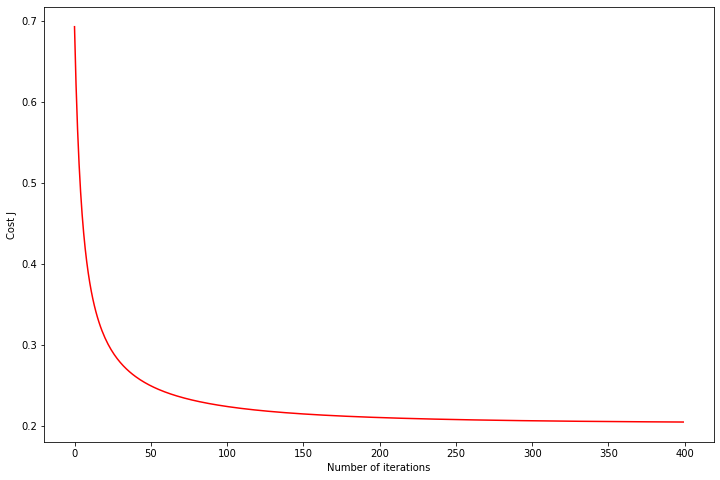

In [155]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(Iterations), cost, 'r')
ax.set_xlabel("Number of iterations")
ax.set_ylabel("Cost J")
plt.show()

In [156]:
ComputePRandF1(X_scale, Y, theta)

TP：55, FP：6, TN：34, FN：5
Precision： 0.9016393442622951
Recall： 0.9166666666666666
F1： 0.9090909090909091


# 正则化的Logistic回归

## 读取数据

In [157]:
path2 = base + "/ex2data2.txt"
data2 = pd.read_csv(path2, header=None, names=["Test1", "Test2", "y"])
data2

,Test1,Test2,y
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


## 数据可视化

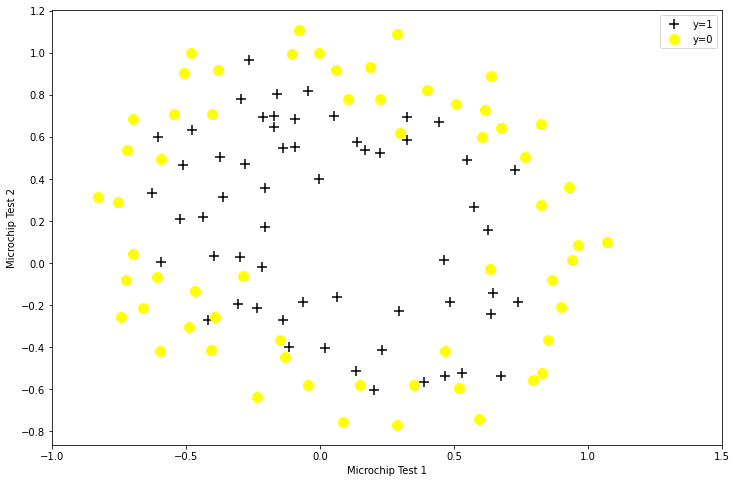

In [158]:
positive = data2[data2['y'].isin([1])]
negative = data2[data2['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'], positive['Test2'], s=100, color='black', marker='+', label='y=1')
ax.scatter(negative['Test1'], negative['Test2'], s=100, color='yellow', marker='o', label='y=0')
ax.legend(loc=1)
ax.set_xlabel("Microchip Test 1")
ax.set_ylabel("Microchip Test 2")
plt.xticks(np.arange(-1, 1.6, 0.5))
plt.yticks(np.arange(-0.8, 1.3, 0.2))
plt.show()

## 数据切割

In [159]:
data2.insert(0, "Ones", 1)

In [160]:
cols = data2.shape[1]

X2 = np.array(data2.iloc[:, :cols-1])
Y2 = np.array(data2.iloc[:, cols-1:cols])

## 特征映射（Feature mapping）
公式：
$$
mapFeature(x)
=\begin{bmatrix}
1 \\
x_1 \\
x_2 \\
x_1^2 \\
x_1x_2 \\
x_2^2 \\
x_1^3 \\
\vdots  \\
x_1x_2^5 \\
x_2^6
\end{bmatrix}
$$
将2维向量，转为28维向量

In [161]:
x1 = np.array(data2.iloc[:, 1])
x2 = np.array(data2.iloc[:, 2])

def FeatureMapping2to28(X, x1, x2):
  X_augment = X
  for i in range(2, 7):
    temp = x1
    for j in range(1, i):
      temp = temp * x1
    X_augment = np.c_[X_augment, temp]
    for j in range(i):
      temp = temp / x1 * x2
      X_augment = np.c_[X_augment, temp]
  return X_augment

X2_augment = FeatureMapping2to28(X2, x1, x2)
X2_augment.shape

(118, 28)

## Sigmoid函数
$$g(z)=\frac{1}{1+e^{-z}}$$

In [162]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

## 假设函数
### 单样本：
$$
h(\theta)
=g(\theta^Tx)
=g(\theta_0x_0+\theta_1x_1+...+\theta_nx_n)
$$
其中：$x$为(n+1)×1维，$\theta$为(n+1)×1维，$h(\theta)$为标量。

### 多样本：
$$
h(\theta)
=g(X\theta)
$$
其中：$X$为m×(n+1)维，$\theta$为(n+1)×1维，$h(\theta)$为m×1维。

In [163]:
def Hypothesis(X, theta):
  return sigmoid(X @ theta)

## 正则化的代价函数
原公式：
$$
J(\theta)
=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}\log(\hat y^{(i)})-(1-y^{(i)})\log(1-\hat y^{(i)})]+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2
$$

实现公式：
$$
J(\theta)
=-\frac{1}{m}[y^T\log(\hat y)+(1-y)^T\log(1-\hat y)]+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2
=-\frac{1}{m}[y^T\log(\hat y)+(1-y)^T\log(1-\hat y)]+\frac{\lambda}{2m}(\theta[1:])^T\theta[1:]
$$
其中：
$$
\theta[1:]
=\begin{bmatrix}
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_n
\end{bmatrix}$$


In [164]:
def ComputeCostReg(X, Y, theta, lambd):
  m = X.shape[0]
  y_hat = Hypothesis(X, theta)
  theta = theta[1:]
  return -1 * (Y.T @ np.log(y_hat) + (1-Y).T @ np.log(1-y_hat)) / m + lambd / (2*m) * (theta.T @ theta)

## 计算带正则化的梯度
公式：

j = 0时：
$$
\frac{\partial J(\theta )}{\partial \theta _0}
=\frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} -y^{(i)})x_0^{(i)}
$$
j ≥ 1时：
$$
\frac{\partial J(\theta )}{\partial \theta _j}
=\frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} -y^{(i)})x_j^{(i)}+\frac{\lambda }{m}\theta _j 
$$

实现公式：

j = 0时：
$$
\frac{\partial J(\theta )}{\partial \theta _0}
=\frac{1}{m}(X[:, 0])^T(\hat{y} -y)
$$
j ≥ 1时：
$$
\frac{\partial J(\theta )}{\partial \theta }
=\frac{1}{m}(X[:, 1:])^T(\hat{y} -y)+\frac{\lambda }{m}\theta[1:]
$$

其中：
$$
\theta[1:]
=\begin{bmatrix}
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_n
\end{bmatrix}$$

综合公式：
$$
\frac{\partial J(\theta )}{\partial \theta }
=\frac{1}{m}X^T(\hat{y} -y)+\frac{\lambda }{m}\Theta
$$

其中：
$$
\Theta
=\begin{bmatrix}
0 \\
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_n
\end{bmatrix}$$

In [165]:
def ComputePartialReg(X, Y, theta, lambd):
  theta = np.insert(theta[1:], 0, values=0, axis=0)
  m = X.shape[0]
  y_hat = Hypothesis(X, theta)
  return (X.T @ (y_hat - Y)) / m + lambd / m * theta

## 梯度下降

In [166]:
def GradientDescent(X, Y, theta, Iterations, LearningRate, lambd):
  cost = np.zeros(Iterations)
  for i in range(Iterations):
    cost[i] = ComputeCostReg(X, Y, theta, lambd)
    theta = theta - LearningRate * ComputePartialReg(X, Y, theta, lambd)
  return cost, theta

## 运行梯度下降

In [167]:
# 超参数设置
Iterations = 3000
LearningRate = 0.01
lambd = 10

theta = np.matrix(np.ones(X2_augment.shape[1])).T

cost, theta = GradientDescent(X2_augment, Y2, theta, Iterations, LearningRate, lambd)
# print(cost)
# print(theta)

## 绘制代价函数曲线

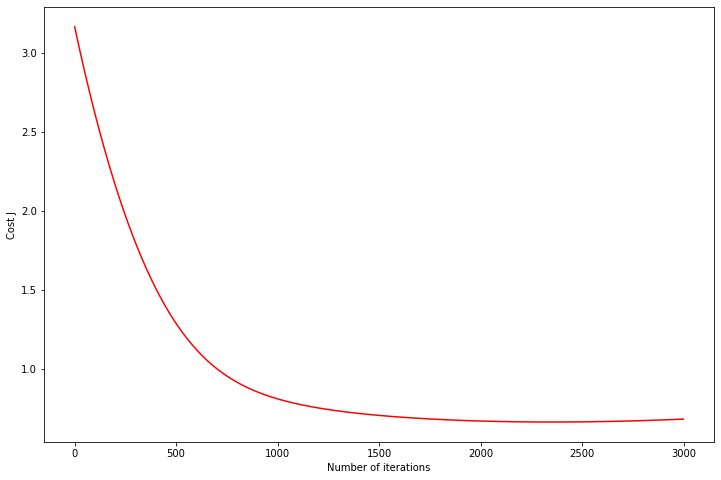

In [168]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(Iterations), cost, 'r')
ax.set_xlabel("Number of iterations")
ax.set_ylabel("Cost J")
plt.show()

## 计算Precision和Recall

In [169]:
def ComputePRandF1(X, Y, theta):
  TP = 0
  FP = 0
  TN = 0
  FN = 0

  y_hat = Hypothesis(X, theta)
  for i in range(X.shape[0]):
    y_hat[i] = 1 if y_hat[i] >= 0.5 else 0
    
    if y_hat[i]:
      if y_hat[i] == Y[i]:
        TP = TP + 1
      else:
        FP = FP + 1
    else:
      if y_hat[i] == Y[i]:
        TN = TN + 1
      else:
        FN = FN + 1
  P = TP/(TP+FP)
  R = TP/(TP+FN)
  F1 = 2*P*R/(P+R)
  print("TP：%d, FP：%d, TN：%d, FN：%d" % (TP, FP, TN, FN))
  print("Precision：", P)
  print("Recall：", R)
  print("F1：", F1)

In [170]:
ComputePRandF1(X2_augment, Y2, theta)

TP：58, FP：52, TN：8, FN：0
Precision： 0.5272727272727272
Recall： 1.0
F1： 0.6904761904761904
